In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
import sqlite3

db_path = "../db.sqlite3"

conn = sqlite3.connect(db_path)

query = "SELECT * FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

query = """
SELECT 
    o.*,
    oi.*,
    p.*
FROM 
    restaurant_order AS o
JOIN 
    restaurant_orderitem AS oi ON o.id = oi.order_id
JOIN 
    restaurant_product AS p ON oi.product_id = p.id
"""

data = pd.read_sql_query(query, conn)

csv_path = "../app/combined_data.csv"
data.to_csv(csv_path, index=False)

conn.close()

df = pd.read_csv(csv_path)
df


,id,datetime,id.1,quantity,order_id,product_id,id.2,price,name
0,1,2019-08-03 20:25:00,1,2,1,6,6,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,2,1,1,240,240,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,3,1,1,19,19,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,4,1,1,36,36,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,5,1,1,111,111,8.95,Paneer Tikka Masala
...,...,...,...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,74814,2,3255,247,247,17.95,House Red wine 75cl
74814,12905,2016-05-14 19:28:00,74815,2,12905,247,247,17.95,House Red wine 75cl
74815,3272,2016-05-10 13:18:00,74816,2,3272,247,247,17.95,House Red wine 75cl
74816,11404,2016-04-07 19:04:00,74817,1,11404,248,248,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

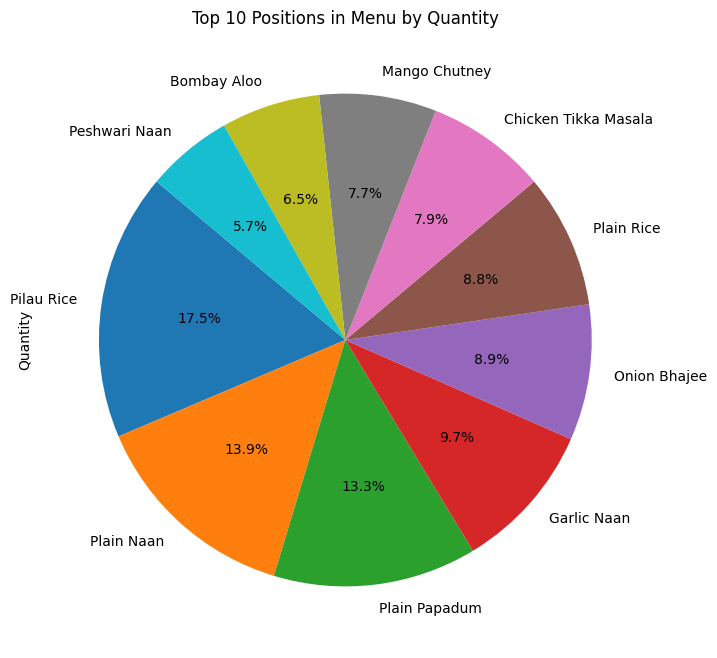

In [8]:
product_quantities = df["name"].value_counts()

top_10_products = product_quantities.head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Positions in Menu by Quantity")
plt.ylabel("Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

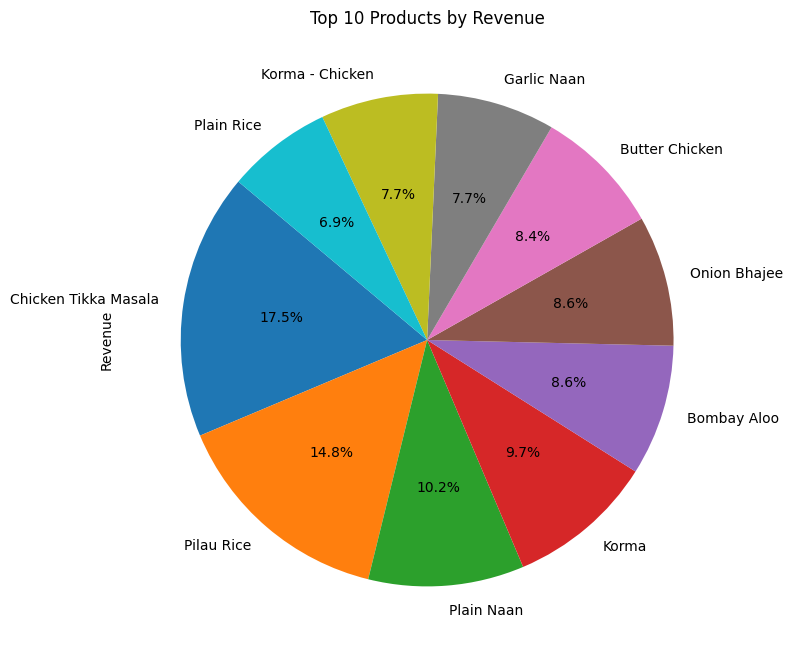

In [10]:
df["Item Price"] = df["price"] * df["quantity"]

product_revenue = df.groupby("name")["Item Price"].sum()

top_10_products_revenue = product_revenue.nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(top_10_products_revenue, labels=top_10_products_revenue.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

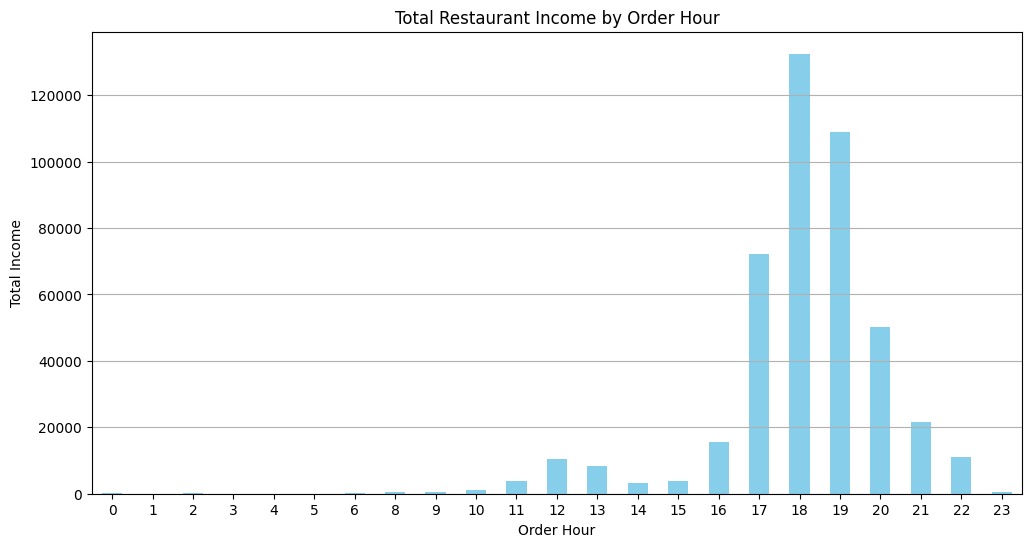

In [13]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["Order Hour"] = df["datetime"].dt.hour
df["Item Price"] = df["price"] * df["quantity"]

income_by_hour = df.groupby("Order Hour")["Item Price"].sum()

plt.figure(figsize=(12, 6))
income_by_hour.plot(kind="bar", color="skyblue")
plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

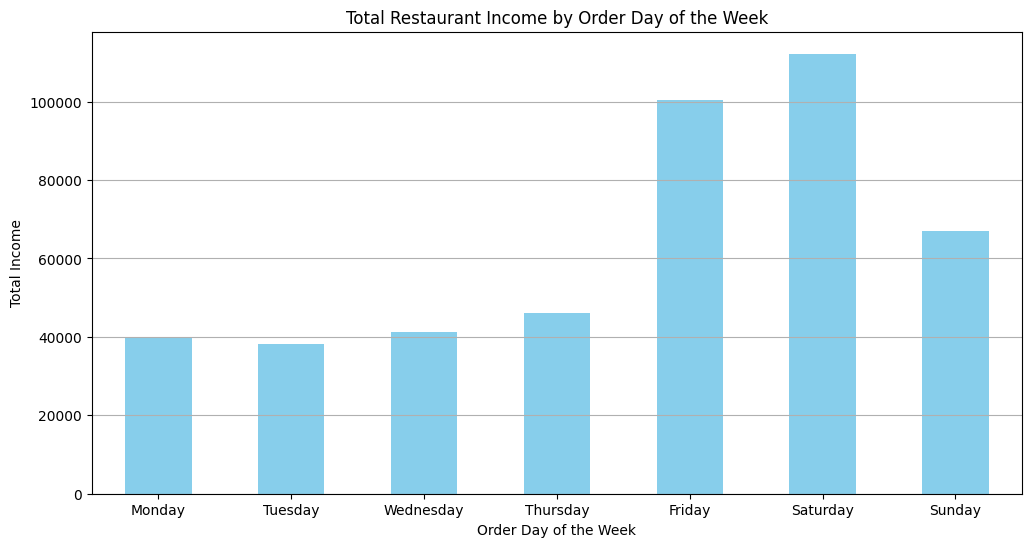

In [15]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["Order Day of the Week"] = df["datetime"].dt.day_name()
df["Item Price"] = df["price"] * df["quantity"]

income_by_day = df.groupby("Order Day of the Week")["Item Price"].sum()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
income_by_day = income_by_day.reindex(ordered_days)

plt.figure(figsize=(12, 6))
income_by_day.plot(kind="bar", color="skyblue")
plt.title("Total Restaurant Income by Order Day of the Week")
plt.xlabel("Order Day of the Week")
plt.ylabel("Total Income")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()